# Softmax

Es una generalización de la Función logística. Se emplea para "comprimir" un vector K-dimensional, ${\displaystyle \mathbf {z} }$, de valores reales arbitrarios en un vector K-dimensional, ${\displaystyle \sigma (\mathbf {z} )}$, de valores reales en el rango [0, 1].  
La función está dada por:

$${\displaystyle \sigma :\mathbb {R} ^{K}\to [0,1]^{K}}$$  
$${\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}} $$

for $j = 1, …, K$.

Nótese que para el caso de K=2, la softmax se reduce a una sigmoidea.

Algunos datos interesantes para tener en cuenta durante el entrenamiento:

- cuando se comienza a entrenar una red, si los pesos son muy chicos, la distribución de salida de una softmax se aproxima a la distribución uniforme:

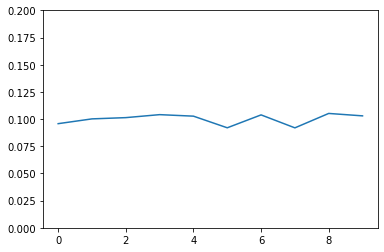

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
logits=np.random.uniform(low=0.0, high=1.0, size=10)
logits=logits/logits.sum()
proba=np.exp(logits)
proba=proba/proba.sum()
plt.ylim([0,0.2])
plt.plot(proba)
plt.show()
#logits=np.array([1,1,1,1,1,1,1,1,1,1])*0.01

A medida que la red se sigue entrenando, el módulo de los logits empieza a aumentar. Y la distribución de salida deja de ser uniforme y va tendiendo 

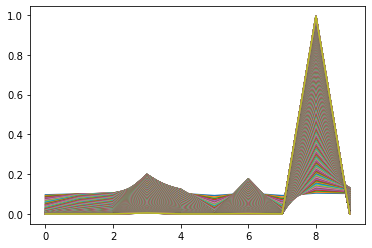

In [2]:
for i in np.arange(1,500,1):
    proba=np.exp(logits*i)
    proba=proba/proba.sum()
    proba
    plt.plot(proba)
plt.show()

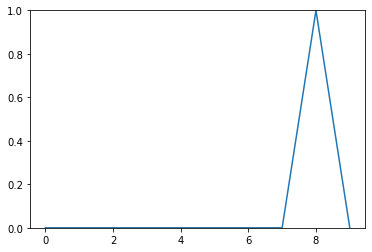

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
proba=np.exp(logits*0)
proba=proba/proba.sum()
line, = ax.plot(proba)
plt.ylim([0,1])
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    proba=np.exp(logits*i)
    proba=proba/proba.sum()
    line.set_ydata(proba)
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 1000), init_func=init,
                              interval=25, blit=True)
ani.save('softmax_const.mp4', writer=writer)

In [4]:
l1=np.linspace(-2,2,num=50)

l2=np.linspace(-2,2,num=50)
l3=np.linspace(-2,2,num=50)
l1,l2,l3=np.meshgrid(l1,l2,l3)

In [5]:
l1.shape

(50, 50, 50)

In [6]:
sm1=np.exp(l1)/(np.exp(l1)+np.exp(l2)+np.exp(l3))
sm2=np.exp(l2)/(np.exp(l1)+np.exp(l2)+np.exp(l3))
sm3=np.exp(l3)/(np.exp(l1)+np.exp(l2)+np.exp(l3))

In [7]:
sm=np.max([sm1,sm2,sm3],axis=0)

In [8]:
mask=sm<0.4

In [9]:
l1=l1*mask
l2=l2*mask
l3=l3*mask
l1=l1.flatten()
l2=l2.flatten()
l3=l3.flatten()
mask=mask.flatten()
l1=l1[mask]
l2=l2[mask]
l3=l3[mask]

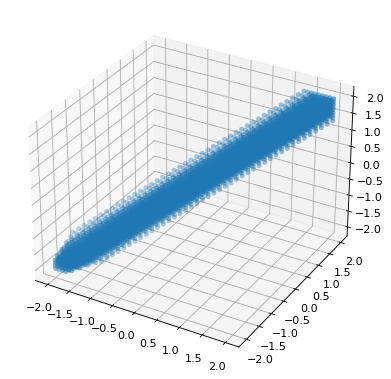

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax = plt.axes(projection='3d')
ax.scatter(l1,l2,l3,
                cmap='viridis', edgecolor='none');

#ax.plot_trisurf(l1,l2,l3,
#                cmap='viridis', edgecolor='none');
#ax.scatter(l1.flatten(), l2.flatten(), l3.flatten(), color='b',)

plt.show()
